
# Importing Related Libraries

In [2]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import warnings filter
import warnings
# ignore all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

In [3]:
diabetes_data = pd.read_csv('diabetes.csv') # Import diabetes dataset
diabetes_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
# Information of datasets
print("The scale of data is", diabetes_data.shape, "\n")
diabetes_data.info()

The scale of data is (10000, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               10000 non-null  int64  
 1   Pregnancies             10000 non-null  int64  
 2   PlasmaGlucose           10000 non-null  int64  
 3   DiastolicBloodPressure  10000 non-null  int64  
 4   TricepsThickness        10000 non-null  int64  
 5   SerumInsulin            10000 non-null  int64  
 6   BMI                     10000 non-null  float64
 7   DiabetesPedigree        10000 non-null  float64
 8   Age                     10000 non-null  int64  
 9   Diabetic                10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [5]:
# Statistical of datasets
# Drop the PatientID columns and transpose the data
diabetes_data.drop(columns=['PatientID']).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,10000.0,3.255800,3.405720,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,10000.0,107.850200,31.920909,44.000000,84.000000,105.000000,129.000000,192.000000
DiastolicBloodPressure,10000.0,71.207500,16.801478,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,10000.0,28.817600,14.506480,7.000000,15.000000,31.000000,41.000000,92.000000
SerumInsulin,10000.0,139.243600,133.777919,14.000000,39.000000,85.000000,197.000000,796.000000
BMI,10000.0,31.567022,9.804366,18.200807,21.247427,31.922421,39.328921,56.034628
DiabetesPedigree,10000.0,0.400944,0.381463,0.078044,0.137065,0.199698,0.621158,2.301594
Age,10000.0,30.134100,12.106047,21.000000,22.000000,24.000000,35.000000,77.000000
Diabetic,10000.0,0.334400,0.471804,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Visualization

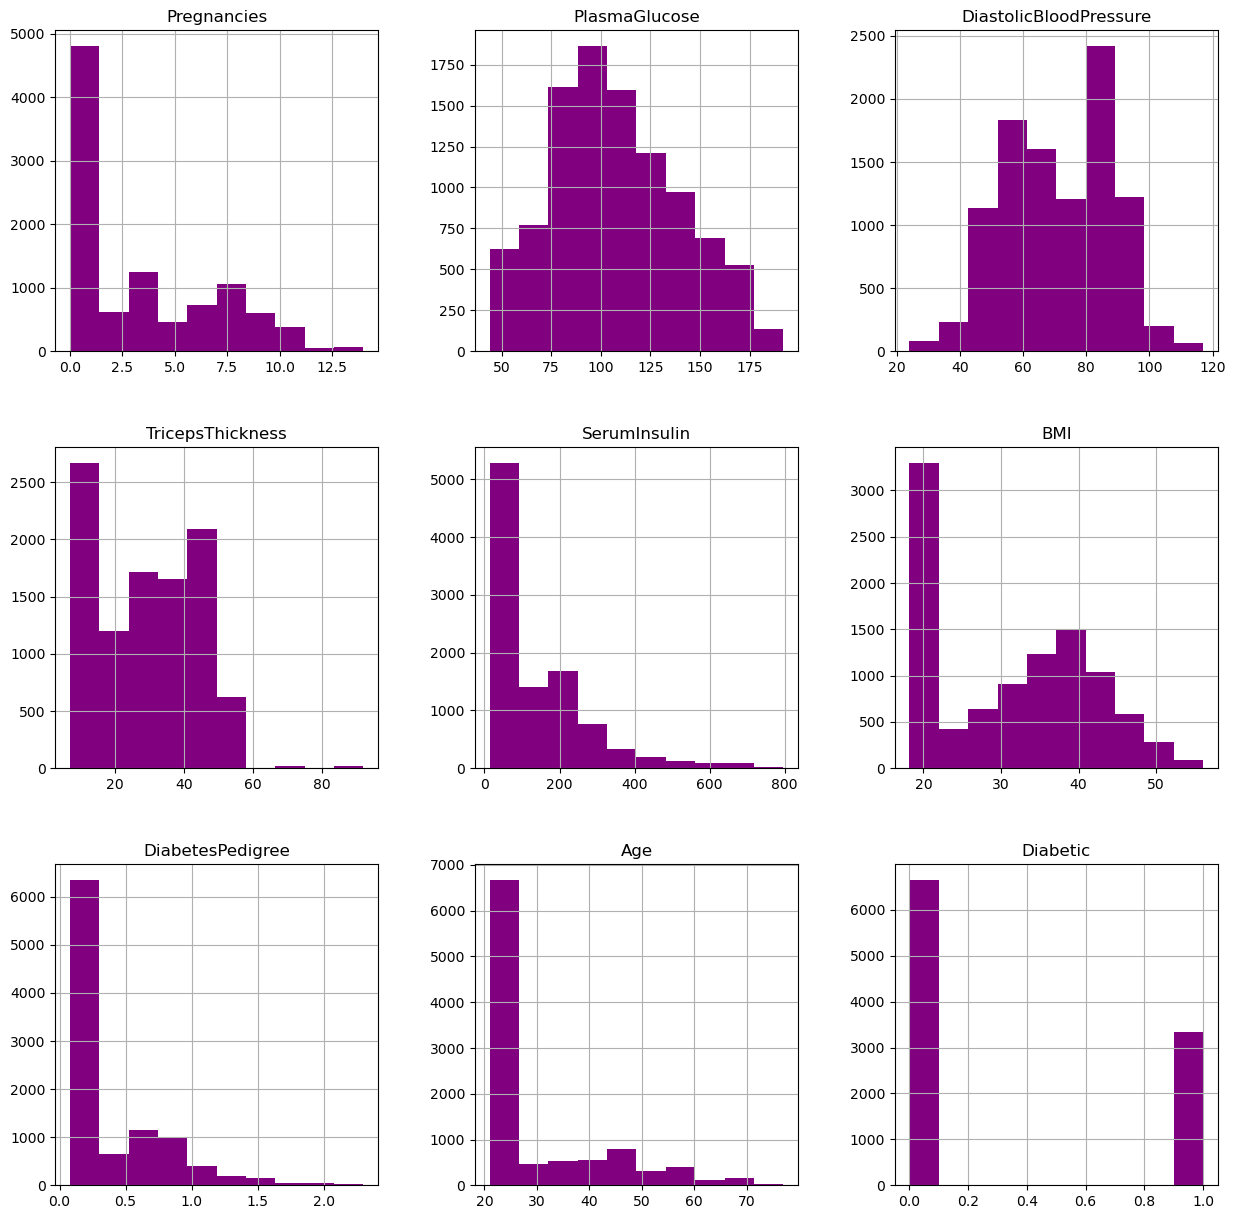

In [6]:
# Histrogram for each attribute in dataset
diabetes_data.hist(figsize=(15,15),column=diabetes_data.drop(columns=['PatientID']).columns,color='purple')
plt.show()

Diabetic
0    6656
1    3344
dtype: int64


<AxesSubplot:xlabel='Diabetic'>

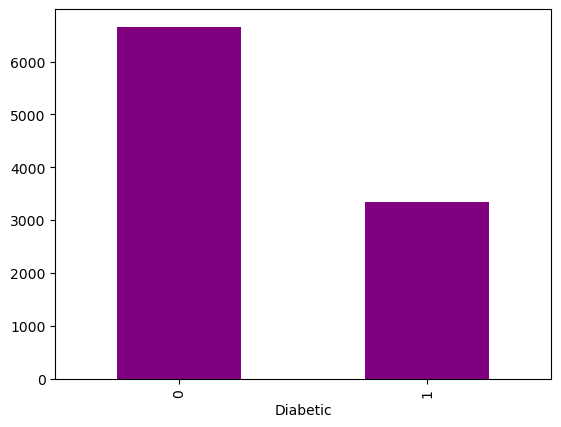

In [7]:
# Class distribution to preview diabetic statistics
result = diabetes_data.groupby('Diabetic').size()
print(result)
result.plot(kind='bar',color='purple')

In [8]:
# Reviewing Skew of Attribute Distribution
diabetes_data.skew()

PatientID                -0.004770
Pregnancies               0.810779
PlasmaGlucose             0.326088
DiastolicBloodPressure   -0.105623
TricepsThickness          0.163612
SerumInsulin              1.741118
BMI                       0.188419
DiabetesPedigree          1.676805
Age                       1.484823
Diabetic                  0.702127
dtype: float64

In [9]:
# Define the feature matrix and target vector before feature selection
X = diabetes_data.drop(columns=['Diabetic'])
y = diabetes_data['Diabetic']
print(X,y)

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0       1354778            0            171                      80   
1       1147438            8             92                      93   
2       1640031            7            115                      47   
3       1883350            9            103                      78   
4       1424119            1             85                      59   
...         ...          ...            ...                     ...   
9995    1469198            6             95                      85   
9996    1432736            0             55                      51   
9997    1410962            5             99                      59   
9998    1958653            0            145                      67   
9999    1332938           10            100                      54   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  
0                   34            23  43.509726          1.213191   21  
1

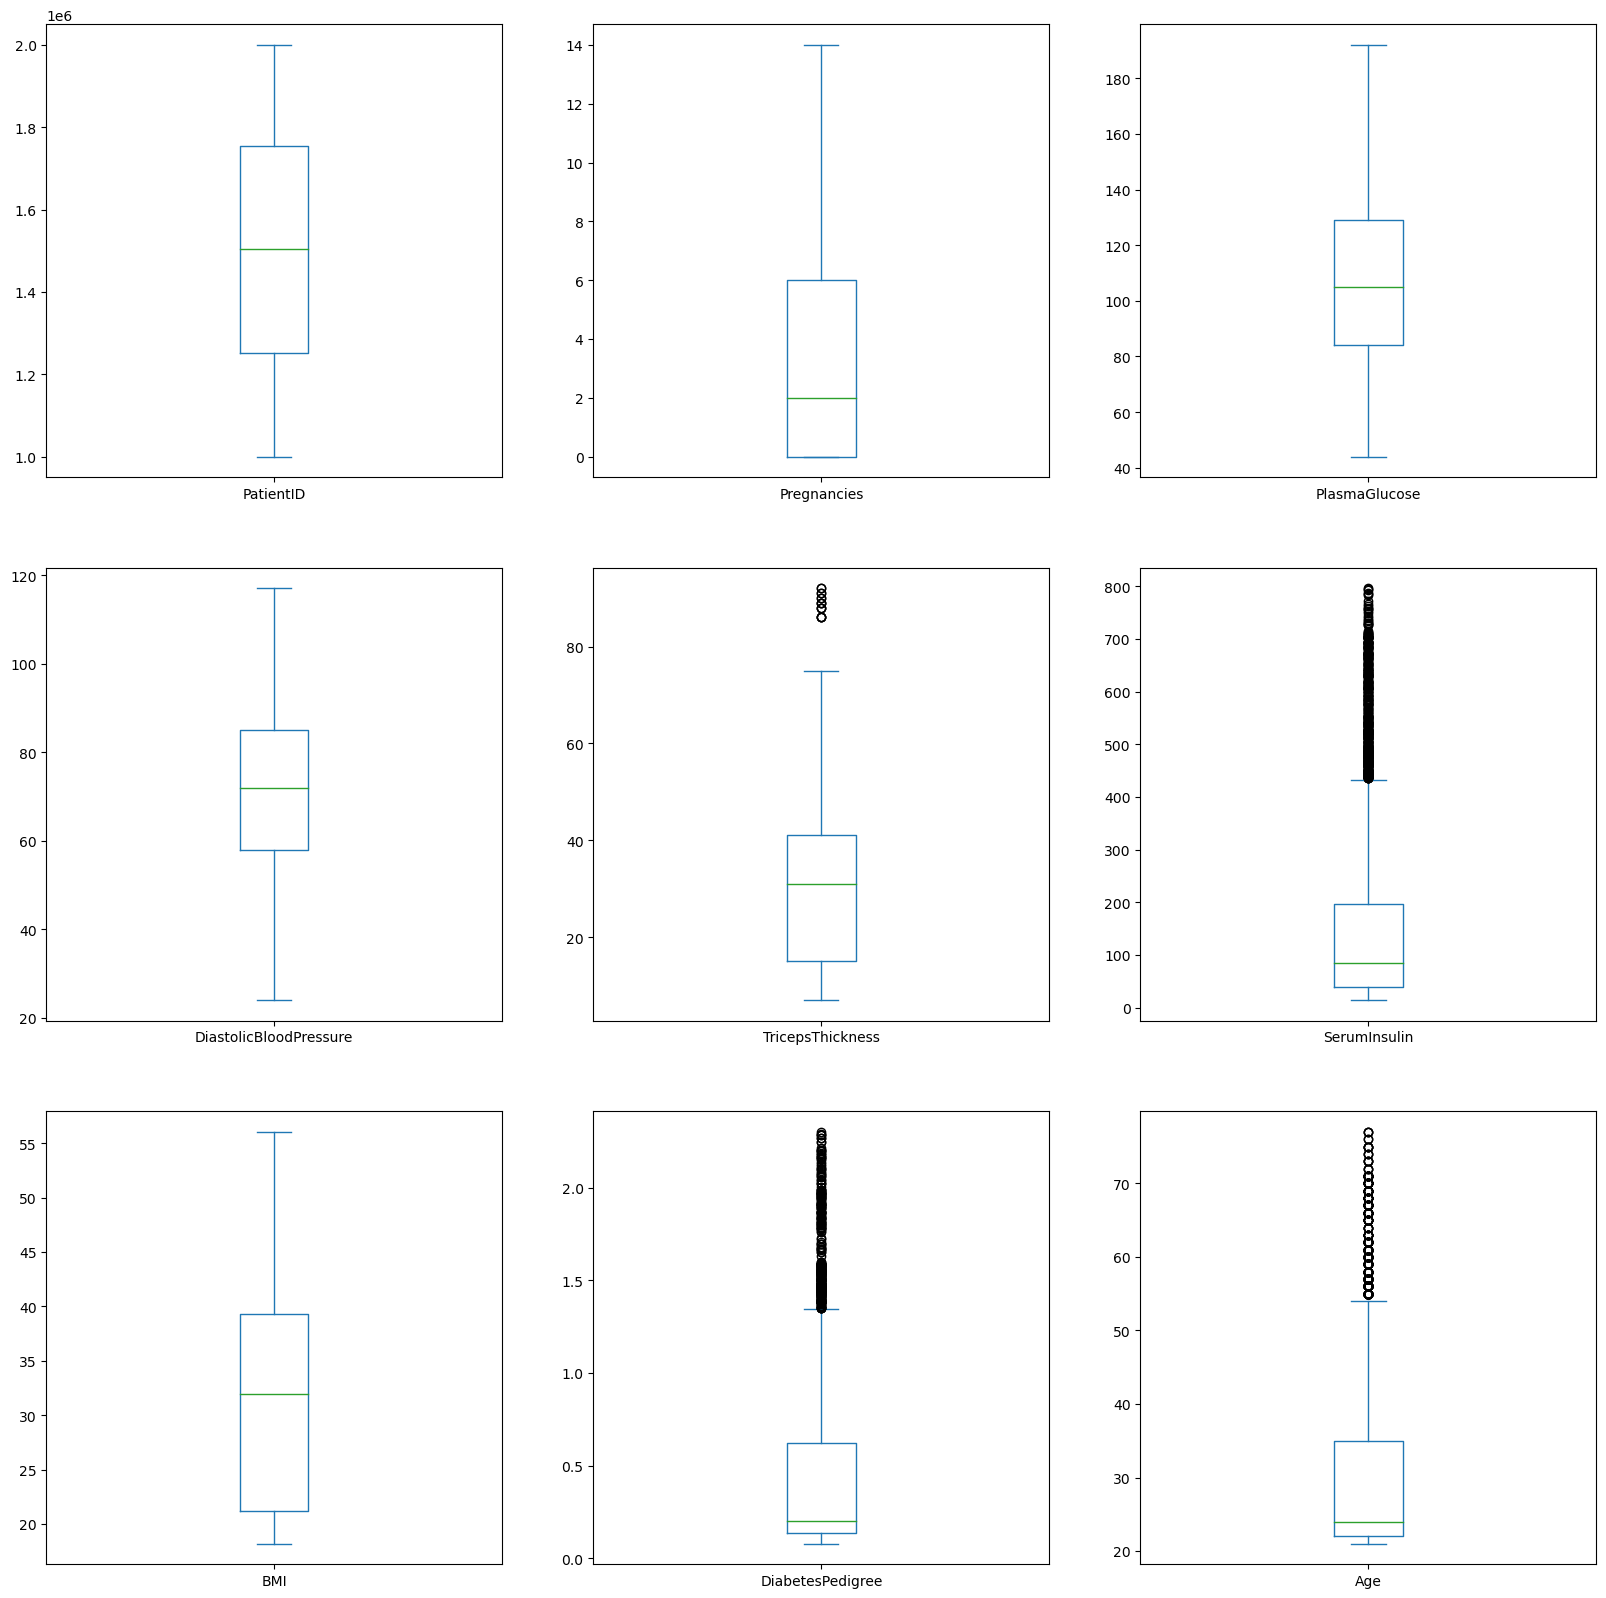

In [10]:
# Box and Whisker Plots
X.plot(figsize=(20,20),kind='box',subplots=True,layout=(3,3),sharex=False)
plt.show()

# Feature Selection Method 

### Filter Method
Filter methods are a type of feature selection method that works by selecting features based on some criteria prior to building the model. 

In our example dataset, all of the features are numeric.
Hence, we cannot remove any feature from feature matrix through filter method

### Pearson’s correlation

Correlation between each features

In [11]:
# Reviewing Correlation between attributes

from pandas import set_option
import seaborn as sns
import matplotlib.pyplot as plt

correlations = round(X.corr(),4)
correlations # 1 represent full positive correlation, -1 represent negative correllation


,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
PatientID,1.0000,0.0046,0.0048,0.0151,-0.0038,-0.0289,-0.0053,-0.0217,-0.0100
Pregnancies,0.0046,1.0000,0.0559,0.0503,0.0600,0.1158,0.0981,0.0560,0.1444
PlasmaGlucose,0.0048,0.0559,1.0000,0.0091,0.0262,0.0285,0.0220,0.0110,0.0367
DiastolicBloodPressure,0.0151,0.0503,0.0091,1.0000,0.0020,0.0157,0.0165,0.0156,0.0429
TricepsThickness,-0.0038,0.0600,0.0262,0.0020,1.0000,0.0191,0.0299,-0.0035,0.0674
SerumInsulin,-0.0289,0.1158,0.0285,0.0157,0.0191,1.0000,0.0475,0.0435,0.0872
BMI,-0.0053,0.0981,0.0220,0.0165,0.0299,0.0475,1.0000,0.0287,0.0627
DiabetesPedigree,-0.0217,0.0560,0.0110,0.0156,-0.0035,0.0435,0.0287,1.0000,0.0593
Age,-0.0100,0.1444,0.0367,0.0429,0.0674,0.0872,0.0627,0.0593,1.0000


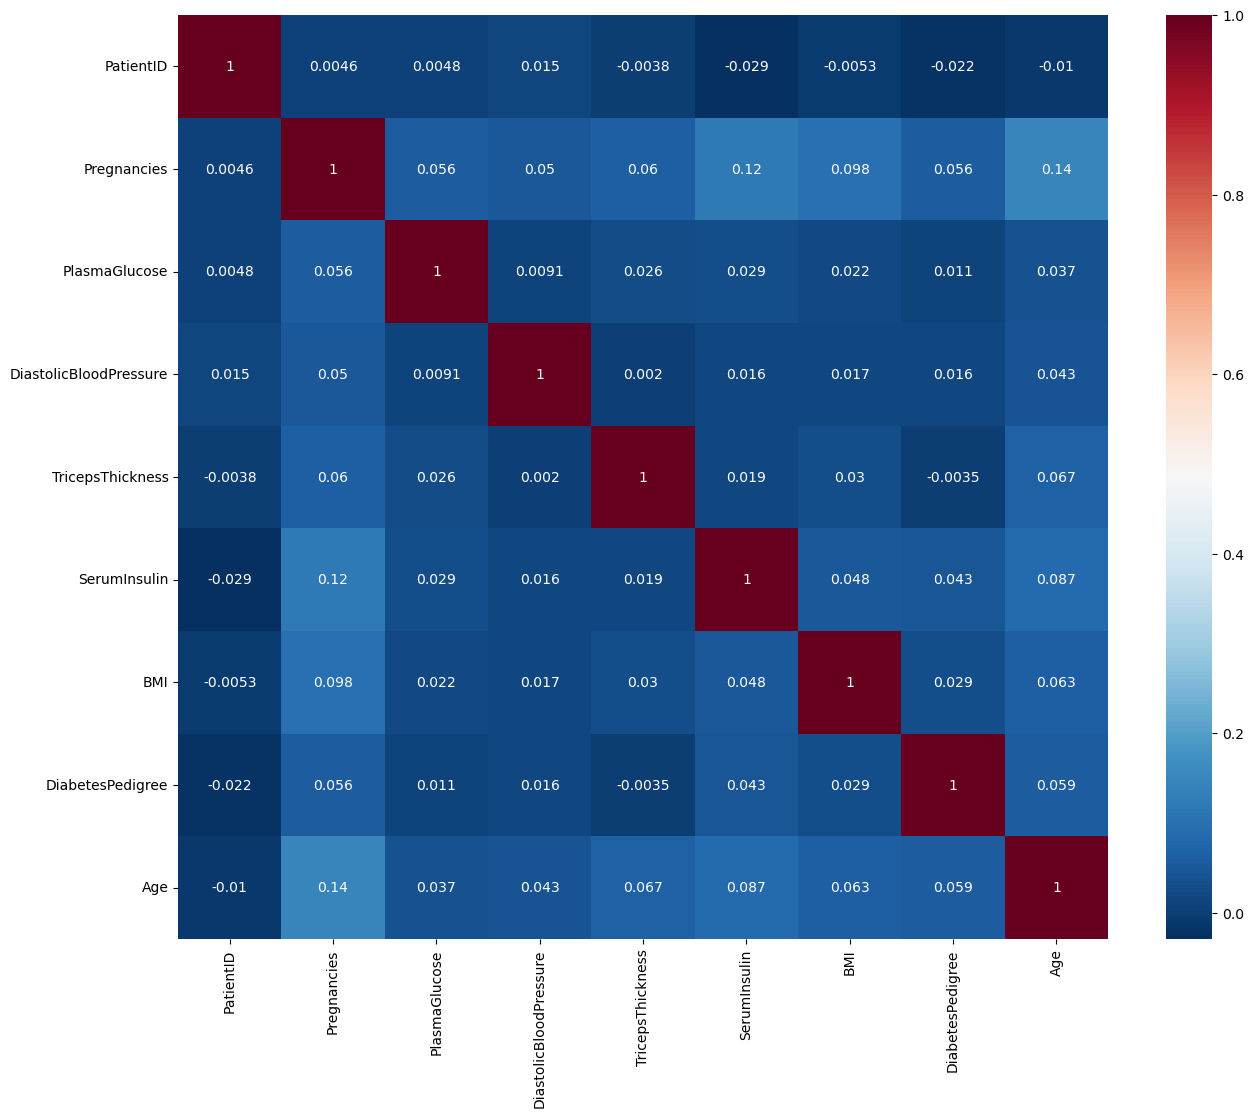

In [12]:
# Visualize the resulting correlation matrix using a heatmap:

plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True,cmap ='RdBu_r')
plt.show()

In [13]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(correlations.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(correlations.iloc[i, j]) > 0.7:
            print(correlations.columns[i], correlations.columns[j], correlations.iloc[i, j])
else:
    print('The coefficient of each features not greater than 0.7')

The coefficient of each features not greater than 0.7


Normally, we define high correlation as having a coefficient of greater than 0.7 or less than -0.7. We use loop to check each feature correlation matrix and realize unneccessary to drop any feature since the each features correlation not greater than 0.7.

Correlation between features and target

In [14]:
# Merge features and targets together for checking correlation
X_y = X.copy()
X_y['Diabetic'] = y
print(X_y)

      PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0       1354778            0            171                      80   
1       1147438            8             92                      93   
2       1640031            7            115                      47   
3       1883350            9            103                      78   
4       1424119            1             85                      59   
...         ...          ...            ...                     ...   
9995    1469198            6             95                      85   
9996    1432736            0             55                      51   
9997    1410962            5             99                      59   
9998    1958653            0            145                      67   
9999    1332938           10            100                      54   

      TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                   34            23  43.509726          1.213191   21   

In [15]:
correlation = X_y.corr()
correlation_target = correlation[['Diabetic']].drop(labels=['Diabetic'])
correlation_target

,Diabetic
PatientID,-0.021959
Pregnancies,0.405161
PlasmaGlucose,0.128800
DiastolicBloodPressure,0.086689
TricepsThickness,0.144062
SerumInsulin,0.244907
BMI,0.213245
DiabetesPedigree,0.171613
Age,0.356701


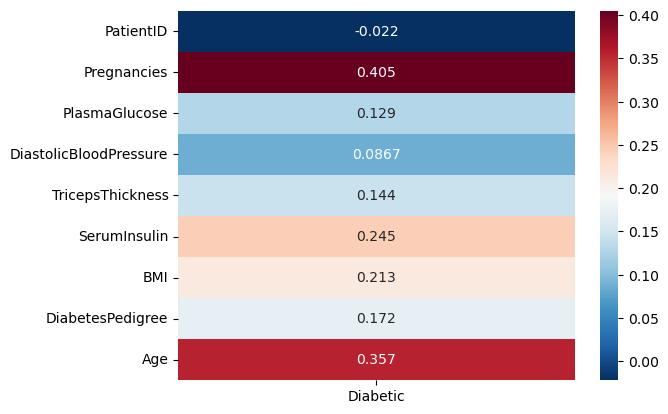

In [16]:
sns.heatmap(correlation_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

From the heatmap above, we can observe the correlation coefficient of PatientID is smaller. We can consider to remove it from datasets if we want to save the times and costs in model training. 

In [17]:
X = X.drop(columns=['PatientID'])
print(X.columns) # Check the feature matrix
X.head()

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X),columns=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'])
X_scaler.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,-0.956028,1.978420,0.523343,0.357265,-0.868973,1.218162,2.129402,-0.754545
1,1.393079,-0.496571,1.297123,1.253461,-0.771792,-1.053302,-0.635948,-0.589330
2,1.099441,0.223996,-1.440868,1.598152,-0.779268,1.014344,-0.843964,-0.589330
3,1.686718,-0.151952,0.404300,-0.263178,1.231628,-0.202454,2.312072,1.062820
4,-0.662389,-0.715874,-0.726609,-0.125302,-0.779268,1.125832,0.389567,-0.671937


# Importing model training and feature selection libraries

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV

### Wrapper Method Function (Sequential Forward Selection with Supervised Learning Algorithms)

In [20]:
def feature_selection(dt_model, x_data):
    
    # Ensure the random distributions are same when execute 
    np.random.seed(0)
    
    sfs = SFS(dt_model,
          k_features=8,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)
    
    sfs.fit(x_data, y)
    for idx, score in sfs.subsets_.items():
    	print(idx,':', score, '\n')
        
    for idx, score in sfs.subsets_.items():
        print(idx,':', score['avg_score'].round(4))
    
    plot_sfs(sfs.get_metric_dict())
    plt.grid()
    plt.title('Accuracy vs Number of Features')
    plt.show()

### Define the confusion matrix plotting Function

In [21]:
def conf_matrix_plot(conf_matrix):
    
    ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.plot(conf_matrix)
    plt.show()

In [22]:
def class_report_plot(class_report):
    
    plt.figure(figsize=(10,3))
    plt.title('Model Classification Report\n\n')
    sns.heatmap(class_report, annot=True,  fmt='g')
    plt.show()

### Decision Tree Algorithm


1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.886 , 0.8955, 0.894 , 0.8835, 0.875 ]), 'avg_score': 0.8868, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 3, 7), 'cv_scores': array([0.873, 0.881, 0.896, 0.88 , 0.882]), 'avg_score': 0.8824, 'feature_names': ('Pregnancies', 'TricepsThickness', 'Age')} 

4 : {'feature_idx': (0, 3, 5, 7), 'cv_scores': array([0.8815, 0.8845, 0.8925, 0.8865, 0.8835]), 'avg_score': 0.8856999999999999, 'feature_names': ('Pregnancies', 'TricepsThickness', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 3, 4, 5, 7), 'cv_scores': array([0.896 , 0.9065, 0.9045, 0.893 , 0.8945]), 'avg_score': 0.8988999999999999, 'feature_names': ('Pregnancies', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.903 , 0.8945, 0.907 , 0.903 , 0.8905]

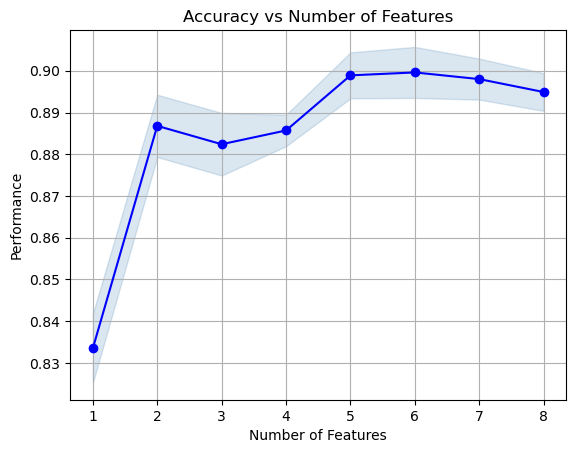

In [23]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

dt_model = DecisionTreeClassifier()
    
# Import feature_selection function
feature_selection(dt_model, X)

In [24]:
 # From wrapper method, we know which features removed was useful to increase accuracy of model.
X_data = X[['Pregnancies', 'PlasmaGlucose', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

dt_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy: ", round(accuracy*100,2), "%\n")

Validation set accuracy:  89.6 %



Validation set accuracy after feature selection:  89.6 %

Decision Tree Model Test Set Accuracy:  88.76 %

Decision Tree Model Confusion Matrix: 



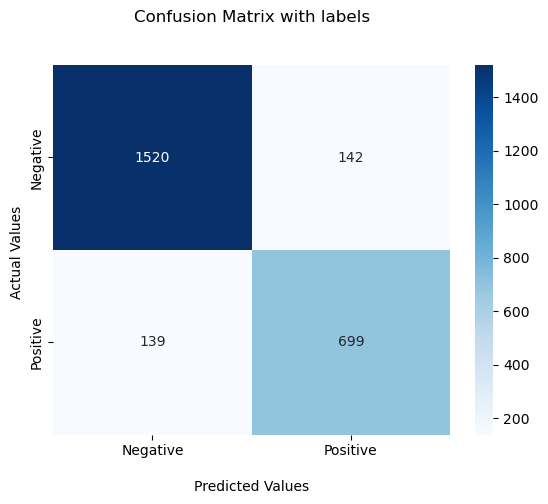

Decision Tree Model Classification Report: 



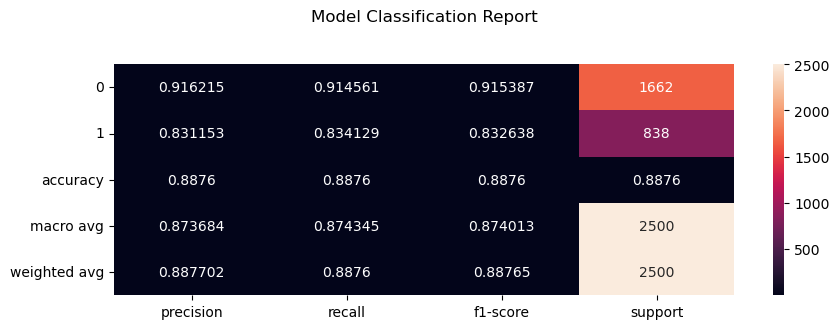

In [25]:
def decisiontree():
    
    # dt_model.fit(X_train, y_train)
    y_predicted = dt_model.predict(X_test)
    
    # Using validation set to get the accuracy after model training
    y_val_pred = dt_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")
    
    accuracy = accuracy_score(y_test, y_predicted)
    print("Decision Tree Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("Decision Tree Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("Decision Tree Model Classification Report: \n")
    class_report_plot(class_report)
    
decisiontree()

val = np.array(y.unique()).astype('str').tolist()

export_graphviz(model, out_file='diabetes.dot',
                    feature_names= ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','str(SerumInsulin)','str(BMI)','DiabetesPedigree','Age'],
                    class_names=sorted(val),
                	label='all',
                	filled=True, rounded=True,
               		)
 

### K Nearest Neighbors Algorithm


1 : {'feature_idx': (0,), 'cv_scores': array([0.8085, 0.82  , 0.8275, 0.8   , 0.8065]), 'avg_score': 0.8125, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.8715, 0.877 , 0.8795, 0.8735, 0.8725]), 'avg_score': 0.8748000000000001, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.8955, 0.8955, 0.8975, 0.8915, 0.9065]), 'avg_score': 0.8973000000000001, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.8995, 0.9065, 0.903 , 0.898 , 0.9055]), 'avg_score': 0.9025000000000001, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.8905, 0.9   , 0.8945, 0.8905, 0.895 ]), 'avg_score': 0.8940999999999999, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 2, 4, 5, 7), 'cv_scores': array([0.8855, 0.8865, 0.8755, 0.8755, 0.8855]), 

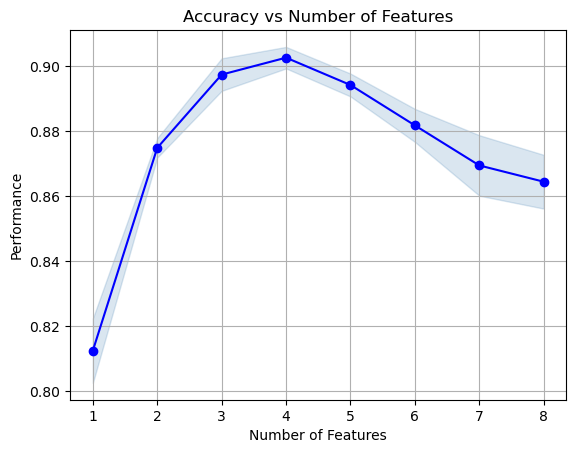

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

feature_selection(knn_model, X_scaler)

In [27]:
X_data = X_scaler[['Pregnancies', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  90.8 %



The maximum accuracy is 91.33333333333333 when the K value is [6] after feature selection.



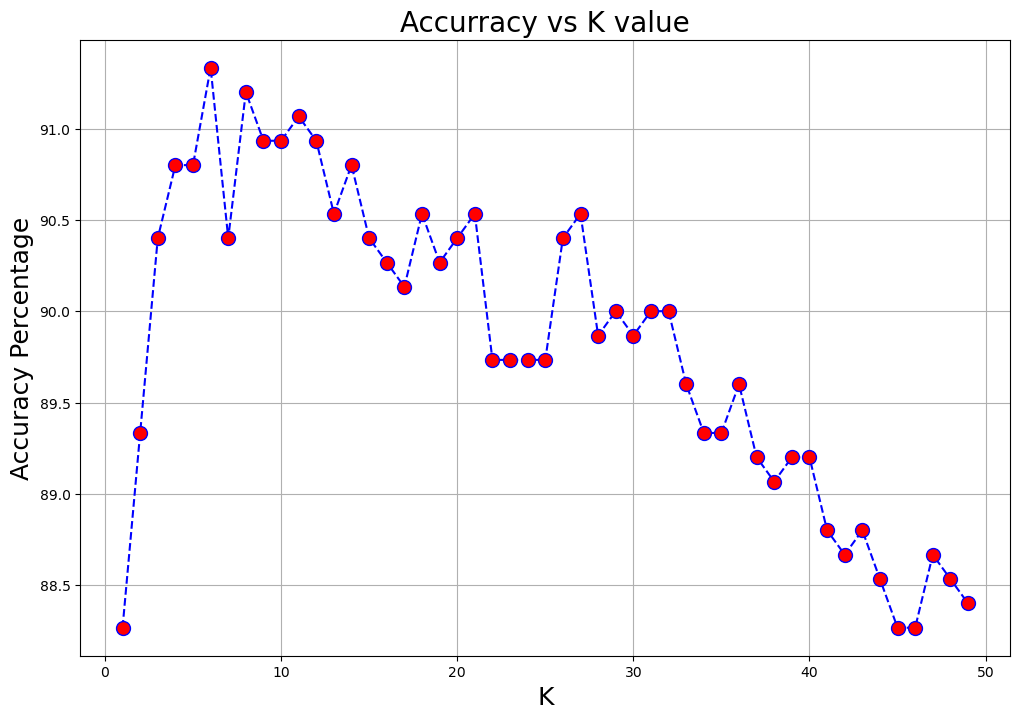

In [28]:
# Define the best value of K in KNN
score_list = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    score = model.score(X_val, y_val)
    score_list.append(score*100)

max_score = max(score_list)

k = [idx+1 for idx, score in enumerate(score_list) if score == max_score]
print(f'The maximum accuracy is {max_score} when the K value is {k} after feature selection.\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,50), score_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accurracy vs K value',size=20)
plt.xlabel('K',size=18)
plt.ylabel('Accuracy Percentage',size=18)
plt.grid()
plt.show()

Validation set accuracy after feature selection:  91.33 %

K Nearest Neighbor Model Test Set Accuracy:  90.08 %

K Nearest Neighbor Model Confusion Matrix: 



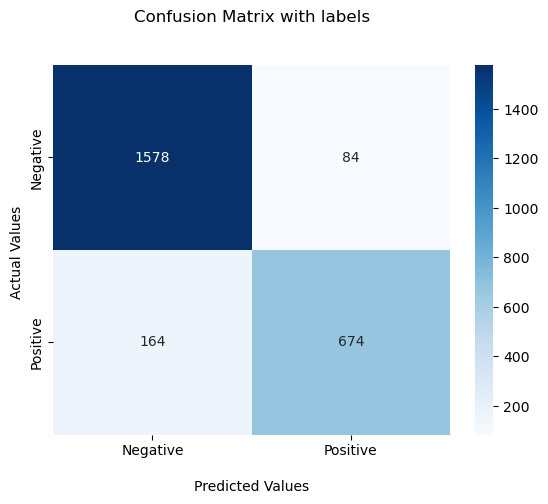

K Nearest Neighbor Model Classification Report: 



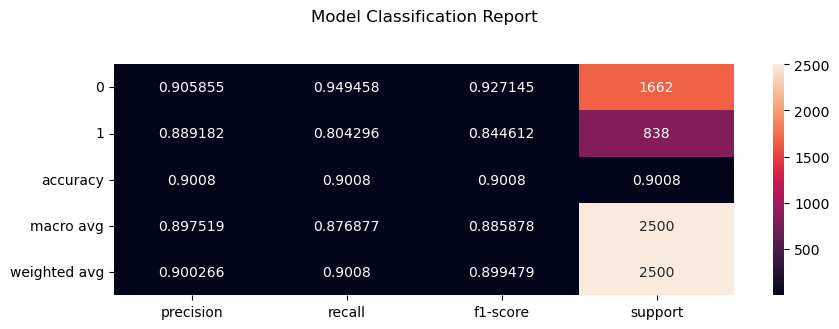

In [29]:
def kneighborsclassifier():
    
    knn_model = KNeighborsClassifier(6)
        
    knn_model.fit(X_train,y_train)
    
    # Using validation set to get the accuracy after model training
    y_val_pred = knn_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")
    
    y_predicted = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predicted)
    print("K Nearest Neighbor Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("K Nearest Neighbor Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("K Nearest Neighbor Model Classification Report: \n")
    class_report_plot(class_report)

kneighborsclassifier()

### Logistic Regression Algorithm

1 : {'feature_idx': (7,), 'cv_scores': array([0.7445, 0.7505, 0.728 , 0.7455, 0.7675]), 'avg_score': 0.7472, 'feature_names': ('Age',)} 

2 : {'feature_idx': (5, 7), 'cv_scores': array([0.745 , 0.7515, 0.738 , 0.7495, 0.7655]), 'avg_score': 0.7499, 'feature_names': ('BMI', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.7465, 0.756 , 0.738 , 0.7545, 0.7605]), 'avg_score': 0.7511, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.7725, 0.7705, 0.7575, 0.768 , 0.7715]), 'avg_score': 0.768, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 4, 5, 6, 7), 'cv_scores': array([0.782 , 0.7775, 0.765 , 0.7675, 0.7775]), 'avg_score': 0.7739, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age')} 

6 : {'feature_idx': (0, 3, 4, 5, 6, 7), 'cv_scores': array([0.781 , 0.7795, 0.7735, 0.779 , 0.782 ]), 'avg_score': 0.779, 'feature_names': ('Pregnancies', 'TricepsT

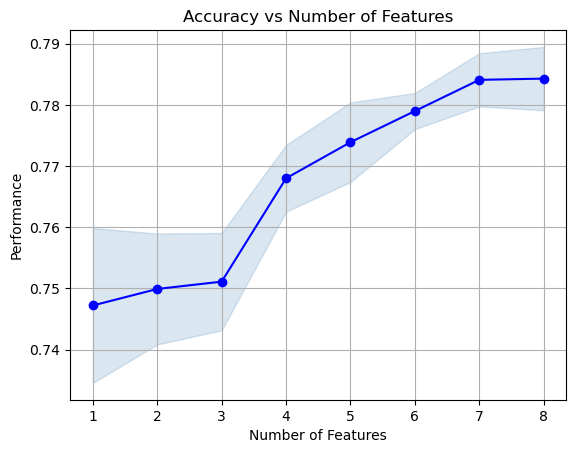

In [30]:
# Logistic Regression Algorithm

from sklearn.linear_model import LogisticRegression

# The initial value of maximum iteration cannot converge
lr_model = LogisticRegression(max_iter=1000)

# Import feature_selection function
feature_selection(lr_model, X)

In [31]:
# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lr_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before hyperparameter tuning: ", round(accuracy*100,2), "%\n")

Validation set accuracy before hyperparameter tuning:  79.6 %



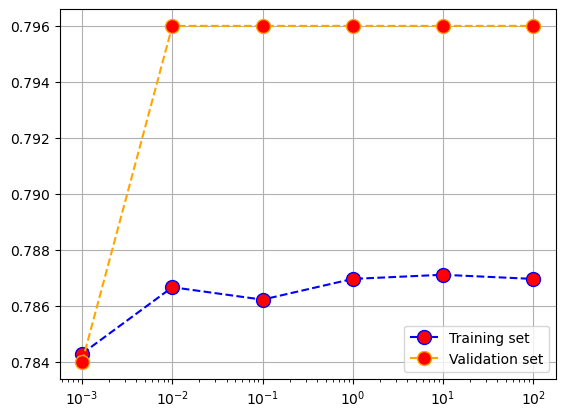

In [32]:
train_array = []
test_array = []
C_array = [0.001, 0.01, 0.1, 1, 10, 100]

for x in C_array:
    clf_new = LogisticRegression(max_iter=1000, C=x)
    clf_new.fit(X_train,y_train)
    y_pred_train = clf_new.predict(X_train)
    train_array.append(accuracy_score(y_pred_train,y_train))
    y_pred_val = clf_new.predict(X_val)
    test_array.append(accuracy_score(y_pred_val,y_val))

plt.plot(C_array,train_array, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(C_array,test_array, color='orange', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.legend(['Training set', 'Validation set'])
plt.grid()
plt.xscale('log')
plt.show()

In [33]:
C_range = np.logspace(-2,2,100)

parameters = {'C': C_range}

lr_model = LogisticRegression(max_iter=1000)

grid = GridSearchCV(lr_model, parameters, cv=3)

grid.fit(X_train,y_train)

print("Best parameters:", grid.best_params_, "\n")
print("Best score:", round(grid.best_score_*100,2), "%\n")

Best parameters: {'C': 0.05857020818056667} 

Best score: 78.76 %



Validation set accuracy after feature selection:  79.6 %

Logistic Regression Model Test set accuracy:  78.04 %

Logistic Regression Model Confusion Matrix: 



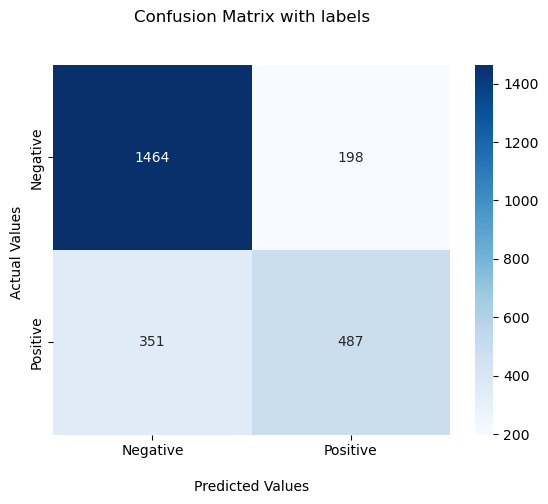

Logistic Regression Model Classification Report: 



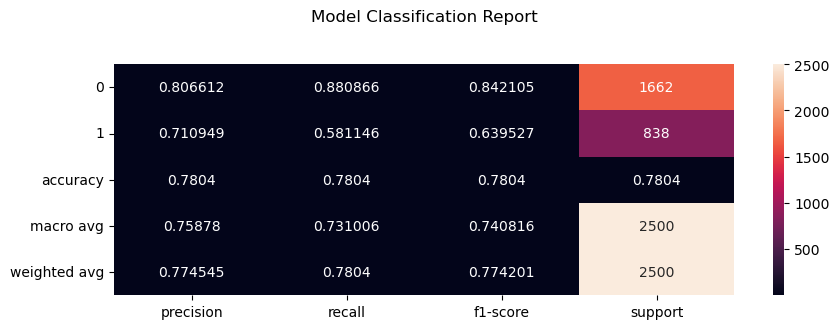

In [34]:
# Logistic Regression Algorithm

def logisticregression():
    
    lr_model = LogisticRegression(max_iter=10000,C=0.059)
    
    lr_model.fit(X_train,y_train)
    
    # Using validation set to get the accuracy after model training
    y_val_pred = lr_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

    # Using test set to get the accuracy after model training
    y_predicted = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predicted)
    print("Logistic Regression Model Test set accuracy: ", round(accuracy*100,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("Logistic Regression Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("Logistic Regression Model Classification Report: \n")
    class_report_plot(class_report)

logisticregression()

### Random Forests Algorithm

1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.887 , 0.8935, 0.894 , 0.8825, 0.879 ]), 'avg_score': 0.8872, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 3, 7), 'cv_scores': array([0.889 , 0.8875, 0.9085, 0.889 , 0.8935]), 'avg_score': 0.8934999999999998, 'feature_names': ('Pregnancies', 'TricepsThickness', 'Age')} 

4 : {'feature_idx': (0, 3, 5, 7), 'cv_scores': array([0.911 , 0.91  , 0.9185, 0.915 , 0.918 ]), 'avg_score': 0.9145, 'feature_names': ('Pregnancies', 'TricepsThickness', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 3, 4, 5, 7), 'cv_scores': array([0.934 , 0.9275, 0.932 , 0.927 , 0.9235]), 'avg_score': 0.9288000000000001, 'feature_names': ('Pregnancies', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.9405, 0.9325, 0.9375, 0.93  , 0.

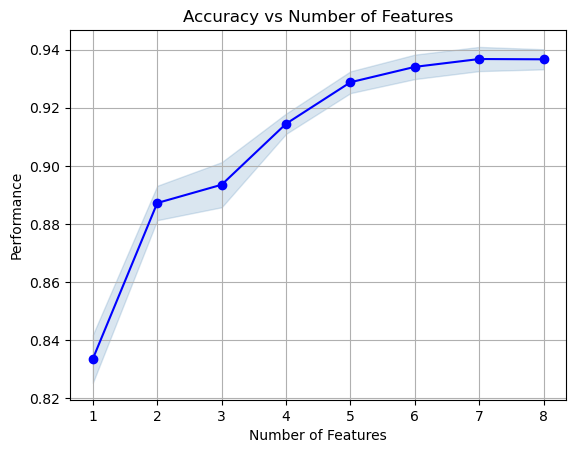

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

feature_selection(rf_model,X)

In [36]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]
   
# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

rf_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy before feature selection:  93.47 %



Validation set accuracy is 93.6 % after the maximum depth of the tree was defined is 24


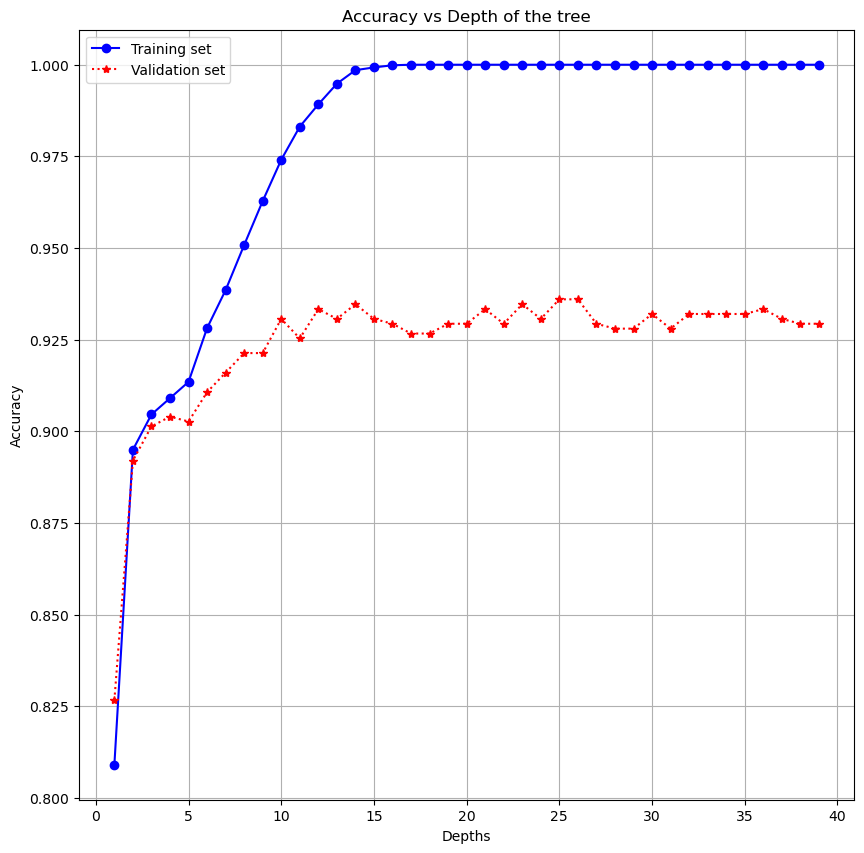

In [37]:
accuracy_train = []
accuracy_test = []

np.random.seed(0)
depths = range(1,40)
for i in depths:
    crf = RandomForestClassifier(max_depth=i)
    crf.fit(X_train, y_train)
    accuracy_test.append(accuracy_score(y_val, crf.predict(X_val)))
    accuracy_train.append(accuracy_score(y_train, crf.predict(X_train)))

max_accuracy = np.max(accuracy_test)*100
max_depth = np.argmax(accuracy_test)

print('Validation set accuracy is', round(max_accuracy,3) ,'% after the maximum depth of the tree was defined is', max_depth)

plt.figure(figsize=(10,10))
plt.plot(depths,accuracy_train,'bo-',depths,accuracy_test,'r*:')
plt.grid()
plt.legend(['Training set','Validation set'])
plt.title('Accuracy vs Depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')

plt.show()

In [38]:
parameters = {'n_estimators': [i for i in range(100,501,100)],
              'max_leaf_nodes': ([i for i in range(10,16,1)] + [None]),
              'max_depth':[i for i in range(20,41,5)]
             }

rf_model = RandomForestClassifier()

grid = GridSearchCV(rf_model, parameters, cv=2)

grid.fit(X_train,y_train)

print("Best parameters:", grid.best_params_, "\n")
print("Best score of training data after hyperparameter tuning:", round(grid.best_score_*100,2), "%\n")

Best parameters: {'max_depth': 35, 'max_leaf_nodes': None, 'n_estimators': 400} 

Best score of training data after hyperparameter tuning: 93.04 %



Validation set accuracy after feature selection:  93.33 %

Random Forest Model Test Set Accuracy: 94.2 %

Random Forest Model Confusion Matrix: 



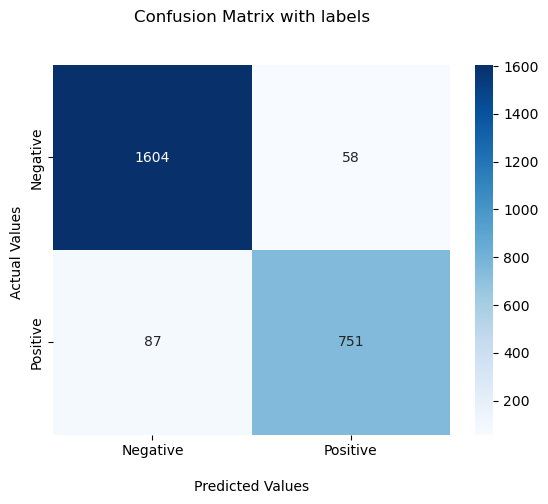

Random Forest Model Classification Report: 



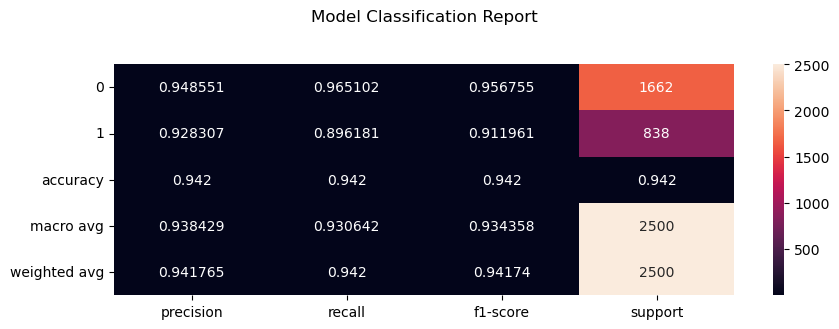

In [39]:
def randomforest():
    
    rf_model = RandomForestClassifier(max_depth=35,
                                      n_estimators=400,
                                      max_leaf_nodes=None)
    
    rf_model.fit(X_train,y_train)
    
    y_val_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")
    
    y_predicted = rf_model.predict(X_test)
    
    #  the accuracy of the final model on the test data
    accuracy = rf_model.score(X_test,y_test)*100
    print("Random Forest Model Test Set Accuracy:", round(accuracy,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("Random Forest Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("Random Forest Model Classification Report: \n")
    class_report_plot(class_report)
    
randomforest()

### Support Vector Machine (SVM) Algorithm

1 : {'feature_idx': (7,), 'cv_scores': array([0.7735, 0.7845, 0.777 , 0.7805, 0.793 ]), 'avg_score': 0.7817000000000001, 'feature_names': ('Age',)} 

2 : {'feature_idx': (4, 7), 'cv_scores': array([0.7925, 0.805 , 0.7915, 0.7935, 0.8055]), 'avg_score': 0.7976, 'feature_names': ('SerumInsulin', 'Age')} 

3 : {'feature_idx': (0, 4, 7), 'cv_scores': array([0.83  , 0.8325, 0.8245, 0.8255, 0.83  ]), 'avg_score': 0.8285, 'feature_names': ('Pregnancies', 'SerumInsulin', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.842 , 0.847 , 0.833 , 0.8475, 0.8445]), 'avg_score': 0.8428000000000001, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.853 , 0.8555, 0.8435, 0.8565, 0.8565]), 'avg_score': 0.8530000000000001, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 4, 5, 6, 7), 'cv_scores': array([0.8535, 0.856 , 0.8435, 0.8565, 0.857 ]), 'avg_score

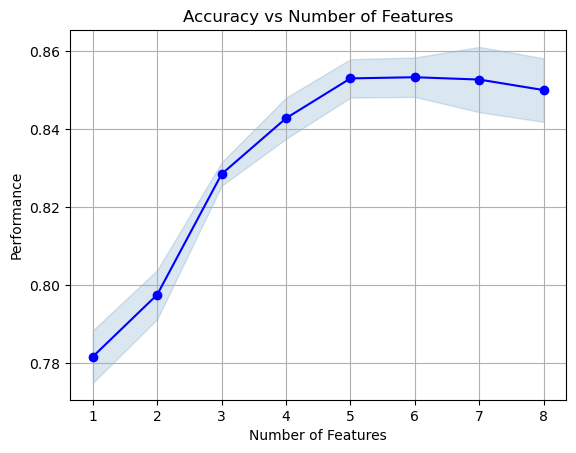

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Initialize the value of C, kernel & gamma
svm_model = SVC(C=1,kernel='rbf',gamma=0.001)

feature_selection(svm_model, X)

In [41]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]
           
# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

svm_model.fit(X_train,y_train)
           
# Using validation set to observe the accuracy during model training
y_val_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy before feature selection:  83.2 %



In [42]:
parameters = {'C':[1,10,100,1000],
                  'kernel':['linear','rbf'],
                  'gamma':[0.001,0.0001]}

grid = GridSearchCV(svm_model, parameters, cv=2)

grid.fit(X_train,y_train)

print("Best parameters:", grid.best_params_)
print("Best score of training data:", round(grid.best_score_*100,2), "%\n")

Best parameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Best score of training data: 85.97 %



Support Vector Machine Model Test Set Accuracy: 88.76 %

Support Vector Machine Model Confusion Matrix: 



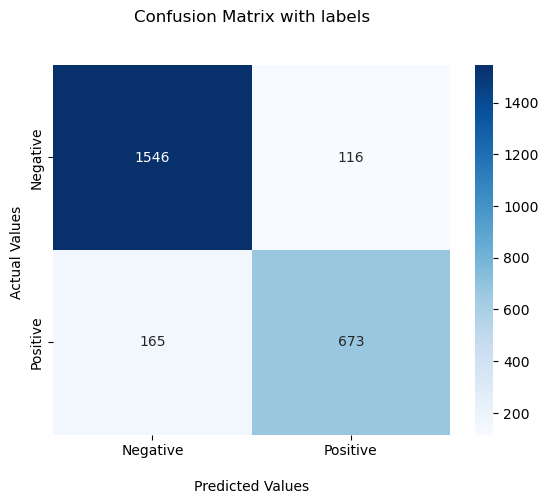

Support Vector Machine Model Classification Report: 



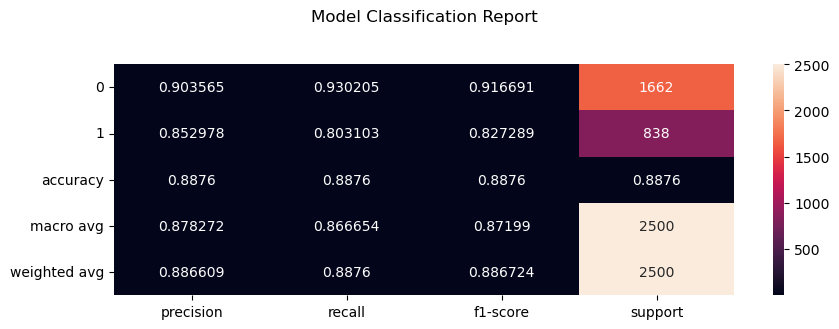

In [43]:
def svm_classifier():
    
    svm_model = SVC(C=1000,
                   kernel='rbf',
                   gamma=0.0001)

    svm_model.fit(X_train,y_train)
    
    y_predicted = svm_model.predict(X_test)
    
    #  the accuracy of the final model on the test data
    accuracy = svm_model.score(X_test,y_test)*100
    print("Support Vector Machine Model Test Set Accuracy:", round(accuracy,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("Support Vector Machine Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("Support Vector Machine Model Classification Report: \n")
    class_report_plot(class_report)
    
svm_classifier()

### XGBoost Algorithm

1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.886 , 0.8955, 0.8925, 0.885 , 0.884 ]), 'avg_score': 0.8886000000000001, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.909 , 0.9085, 0.918 , 0.9105, 0.911 ]), 'avg_score': 0.9114000000000001, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.9345, 0.931 , 0.935 , 0.9325, 0.925 ]), 'avg_score': 0.9316000000000001, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.9505, 0.947 , 0.9485, 0.941 , 0.938 ]), 'avg_score': 0.945, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.9545, 0.9485, 0.954 , 0.948 , 0.9465]), '

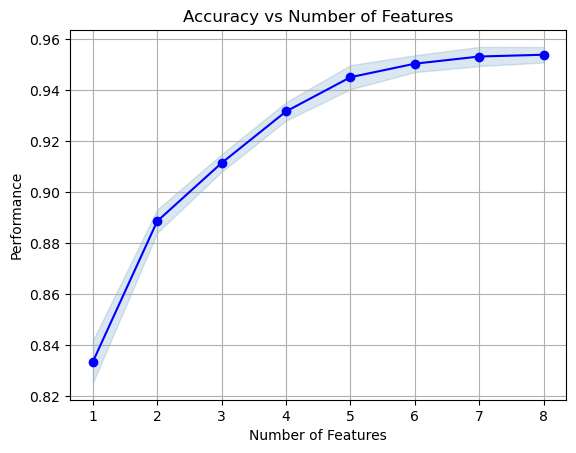

In [44]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

feature_selection(xgb_model,X)

In [45]:
# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

xgb_model.fit(X_train,y_train)
           
# Using validation set to observe the accuracy during model training
y_val_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy before feature selection:  95.87 %



In [46]:
parameters = {'booster':['gbtree', 'dart'], 
             'eta':[0.01,0.05,0.1,0.15,0.2],  # eta typically between 0.01 and 0.2
             'max_depth':[i for i in range(3,10,2)], # max_depth typically between 3 and 10
             'subsample':[0.5,0.8,1]} # subsample typically between 0.5 and 1

grid = GridSearchCV(xgb_model, parameters, cv=3)

grid.fit(X_train,y_train)

print("Best parameters:", grid.best_params_)
print("Best score of training data:", round(grid.best_score_*100,2), "\n")

Best parameters: {'booster': 'dart', 'eta': 0.2, 'max_depth': 3, 'subsample': 0.8}
Best score of training data: 95.42 



Validation set accuracy after feature selection:  94.8 %

XGBoost Model Test set accuracy:  96.12 %

XGBoost Model Confusion Matrix: 



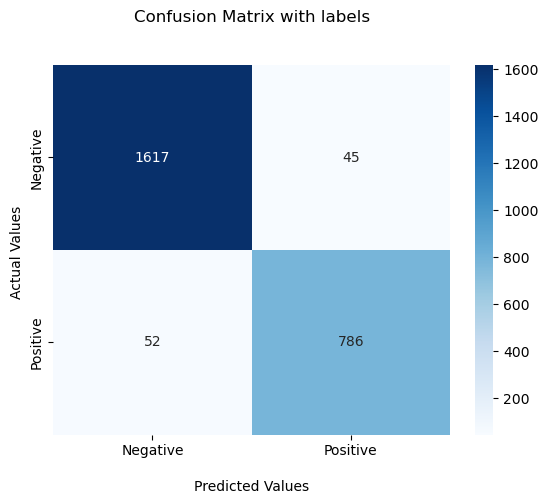

XGBoost Model Classification Report: 



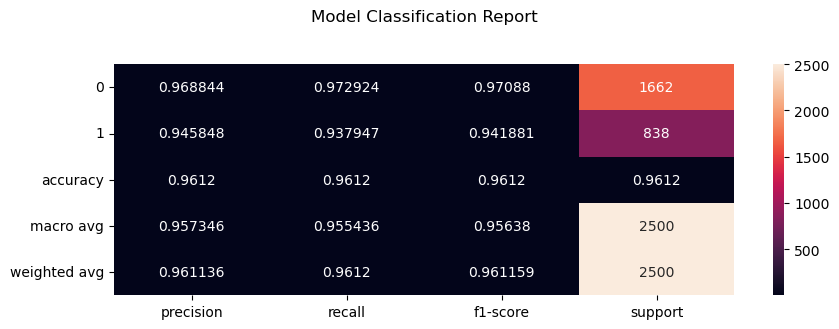

In [47]:
def xgboost_classifier():

    xgb_model = XGBClassifier(booster='dart', 
                             eta=0.2, 
                             max_depth=3, 
                             subsample=0.8)
    
    xgb_model.fit(X_train,y_train)
    
    y_val_pred = xgb_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")
    
    y_predicted = xgb_model.predict(X_test)
    
    #  the accuracy of the final model on the test data
    accuracy = xgb_model.score(X_test,y_test)*100
    print("XGBoost Model Test set accuracy: ", round(accuracy,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("XGBoost Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("XGBoost Model Classification Report: \n")
    class_report_plot(class_report)
    
xgboost_classifier()

### LGBM Algorithm

1 : {'feature_idx': (0,), 'cv_scores': array([0.8255, 0.839 , 0.8445, 0.836 , 0.8225]), 'avg_score': 0.8334999999999999, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 7), 'cv_scores': array([0.8855, 0.8965, 0.894 , 0.8875, 0.8865]), 'avg_score': 0.89, 'feature_names': ('Pregnancies', 'Age')} 

3 : {'feature_idx': (0, 5, 7), 'cv_scores': array([0.917 , 0.9175, 0.9225, 0.9115, 0.918 ]), 'avg_score': 0.9173, 'feature_names': ('Pregnancies', 'BMI', 'Age')} 

4 : {'feature_idx': (0, 4, 5, 7), 'cv_scores': array([0.9435, 0.932 , 0.9375, 0.936 , 0.9285]), 'avg_score': 0.9355, 'feature_names': ('Pregnancies', 'SerumInsulin', 'BMI', 'Age')} 

5 : {'feature_idx': (0, 1, 4, 5, 7), 'cv_scores': array([0.949 , 0.941 , 0.9455, 0.938 , 0.938 ]), 'avg_score': 0.9422999999999998, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'Age')} 

6 : {'feature_idx': (0, 1, 3, 4, 5, 7), 'cv_scores': array([0.952 , 0.948 , 0.9555, 0.948 , 0.943 ]), 'avg_score': 0.9493, 'feat

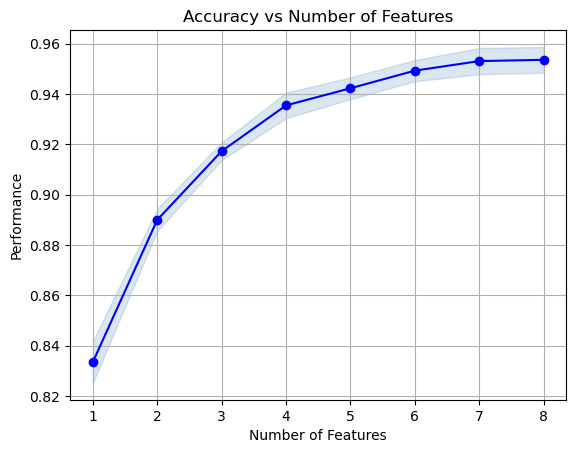

In [48]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

feature_selection(lgbm_model,X)


In [49]:
# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lgbm_model.fit(X_train,y_train)
           
# Using validation set to observe the accuracy during model training
y_val_pred = lgbm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy: ", round(accuracy*100,2), "%\n")

Validation set accuracy:  94.93 %



In [50]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(0)
parameters = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)
}
              
rs = RandomizedSearchCV(lgbm_model, parameters, cv=2)

rs.fit(X_train,y_train)

print("Best parameters:", rs.best_params_, "\n")
print("Best score of training data:", round(rs.best_score_*100,2), "%\n")

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current valu

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=120, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=120
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Best parameters: {'num_leaves': 1200, 'min_data_in_leaf': 120, 'max_depth': 10, 'feature_fraction': 0.5, 'bagging_frequency': 5, 'bagging_fraction': 0.8} 

Best score of training data: 94.76 %




Validation set accuracy after feature selection:  94.8 %

LGBM Classifier Model Test set accuracy: 96.28 %

LGBM Classifier Model Confusion Matrix: 



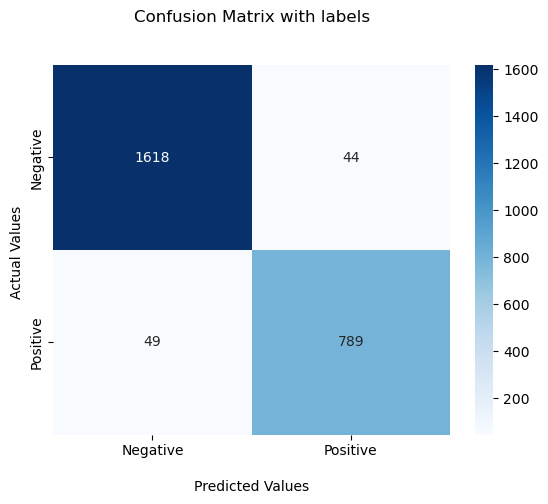

LGBM Classifier Model Classification Report: 



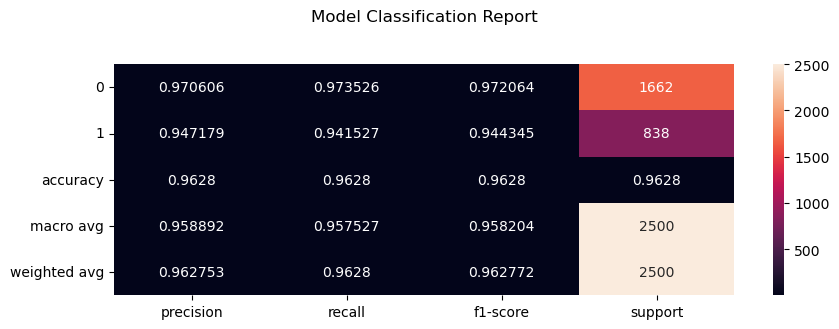

In [51]:
def lgbm_classifier():
    
    global lgbm_model
    
    lgbm_model = LGBMClassifier(max_depth=10,
                               num_leaves= 1200,
                               feature_fraction=0.5,
                               min_data_in_leaf=120,
                               bagging_frequency = 5,
                               bagging_fraction=0.8
                              )
    
    lgbm_model.fit(X_train,y_train)
    
    y_val_pred = lgbm_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print("\nValidation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")
    
    y_predicted = lgbm_model.predict(X_test)
    
#     test_data = np.array([9, 103, 78, 25, 304, 29.58219193, 1.282869847, 43])
#     data = test_data.reshape(1,-1)
#     y_try = lgbm_model.predict(data)
#     print(y_try)
    
    #  the accuracy of the final model on the test data
    accuracy = lgbm_model.score(X_test,y_test)*100
    print("LGBM Classifier Model Test set accuracy:", round(accuracy,2), "%\n")
    
    conf_matrix = confusion_matrix(y_test, y_predicted)
    print("LGBM Classifier Model Confusion Matrix: \n")
    conf_matrix_plot(conf_matrix)
    
    class_report = pd.DataFrame(classification_report(y_test, y_predicted, output_dict=True)).transpose()
    print("LGBM Classifier Model Classification Report: \n")
    class_report_plot(class_report)
    
lgbm_classifier()

## Deploy the highest accuracy model ( LGBM Classfier Model)

In [52]:
# import pickle

# pickle.dump(lgbm_model, open('model.pkl', 'wb'))

# model = pickle.load(open('model.pkl','rb'))